In [11]:
import pandas as pd
import seaborn as sns
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('Data_Salaries.csv')

In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [14]:
df.info()
#Większość danych jest obiektami, wartości wypłat są liczbami całkowitym w procesie normalizacji zmieniamy je na liczby zmiennoprzeciwnkowe, aby uzyskać wartości w przedziale od 0 do 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,245.0,502541.812245,2.276230e+06,4000.0,60000.0,103000.0,174000.0,30400000.0
salary_in_usd,245.0,99868.012245,8.398333e+04,2876.0,45896.0,81000.0,130000.0,600000.0
remote_ratio,245.0,69.183673,3.759342e+01,0.0,50.0,100.0,100.0,100.0


In [16]:
#Zmieniamy typy kolumn.
#W związku z tym, że są one kategoriami w większości to tak je również przedstawimy, np. dane o experience_level, employment_type

#zmiana typu kolumny salary_in_usd na float aby po normalizacji nie było 0
        
#usuwam zbędne kolumny: salary, salary_currency
df.drop(columns=['salary', 'salary_currency'], axis=1, inplace=True)

        
y=df.select_dtypes(exclude='int64')  #wyklucza kolumnę, która jest int64
columnNames=y.columns.tolist() #uzyskuję wszytskie kolumny, które są obiektami do zmiany na kategorię
        
df['salary_in_usd']=(df['salary_in_usd']).astype(float) #zmiana wypłaty na typ zmiennoprzecinkowy

#Zmieniam obiekty na kategorie.
for col in columnNames:
    df[col]=df[col].astype('category')
        
        
#Rok 2021 posiada literkę e jako, że jest estymowany usuwam literkę 
df['work_year']=np.where(df['work_year']=='2021e','2021',df['work_year'])
                    
                    
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           245 non-null    object  
 1   experience_level    245 non-null    category
 2   employment_type     245 non-null    category
 3   job_title           245 non-null    category
 4   salary_in_usd       245 non-null    float64 
 5   employee_residence  245 non-null    category
 6   remote_ratio        245 non-null    int64   
 7   company_location    245 non-null    category
 8   company_size        245 non-null    category
dtypes: category(6), float64(1), int64(1), object(1)
memory usage: 12.0+ KB


In [17]:
#Otrzymujemy informację ile unikatowych kategorii otrzymujemy w każdej z kolumn. Posiadamy 43 różne stanowiska pracy to może wpłynąć na wybór parametru k.
pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.select_dtypes(exclude='float64')],columns=['Nazwa_Kolumny', 'Ilość_Unikatowych_Wartości']).sort_values(by=['Ilość_Unikatowych_Wartości'])


,Nazwa_Kolumny,Ilość_Unikatowych_Wartości
0,work_year,2
5,remote_ratio,3
7,company_size,3
1,experience_level,4
2,employment_type,4
6,company_location,41
3,job_title,43
4,employee_residence,45


In [18]:
#Informacje na temat danych.
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,245,2,2021,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience_level,245,4,MI,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,245,4,FT,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,245,43,Data Scientist,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,245.0,NaN,NaN,NaN,99868.012245,83983.326949,2876.0,45896.0,81000.0,130000.0,600000.0
employee_residence,245,45,US,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,245.0,NaN,NaN,NaN,69.183673,37.593421,0.0,50.0,100.0,100.0,100.0
company_location,245,41,US,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,245,3,L,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

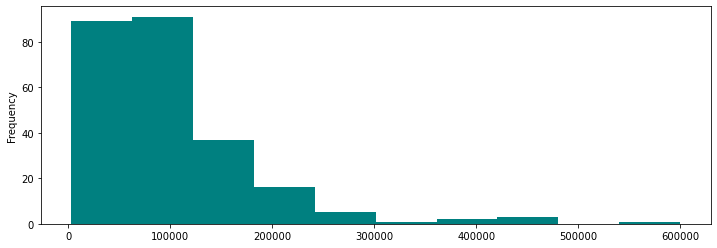

In [19]:
#Wykresy w celu lepszego poznania analizowanych danych

plt.figure()
df["salary_in_usd"].plot.hist(color="teal",figsize=(12, 4))
#Histogram przedstawia, że jest ponad 160 wierszy/osób zarabiających w zakresie 0,10000, Przedstawia jak układają się zarobki w dziedzinie datascinetist

<AxesSubplot:>

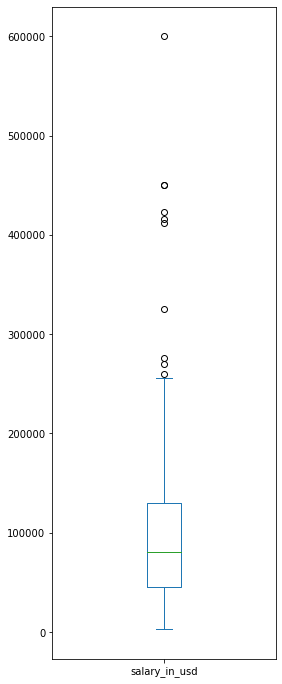

In [20]:
#Wykres wypłat
plt.figure()
df['salary_in_usd'].plot.box(figsize=(4, 12))


<AxesSubplot:xlabel='Wysokość wypłaty USD', ylabel='Stanowisko pracy'>

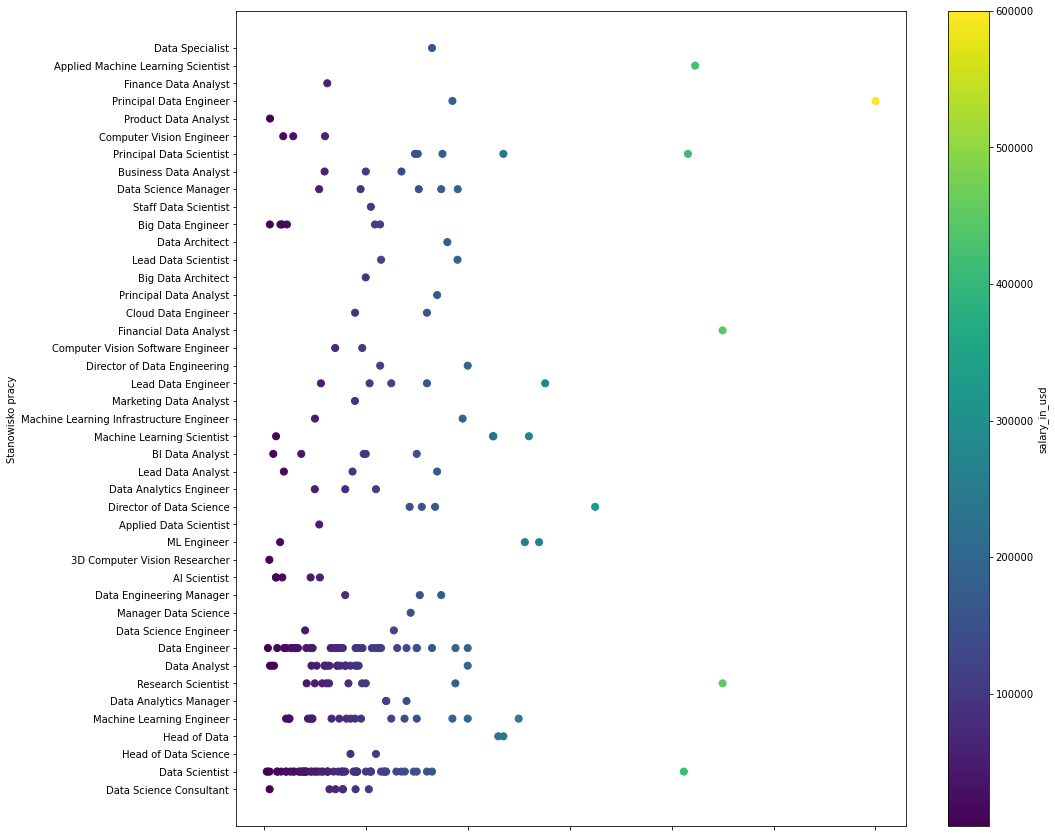

In [22]:
#Wykres porównujący stanowisko z wypłatą i ułożenie dancyh.
df.plot.scatter(x='salary_in_usd',xlabel="Wysokość wypłaty USD",y='job_title', ylabel="Stanowisko pracy",figsize=(15, 15),c='salary_in_usd',cmap="viridis",s=50)

<AxesSubplot:xlabel='Wysokość wypłaty USD', ylabel='Obywatelstwo pracownika'>

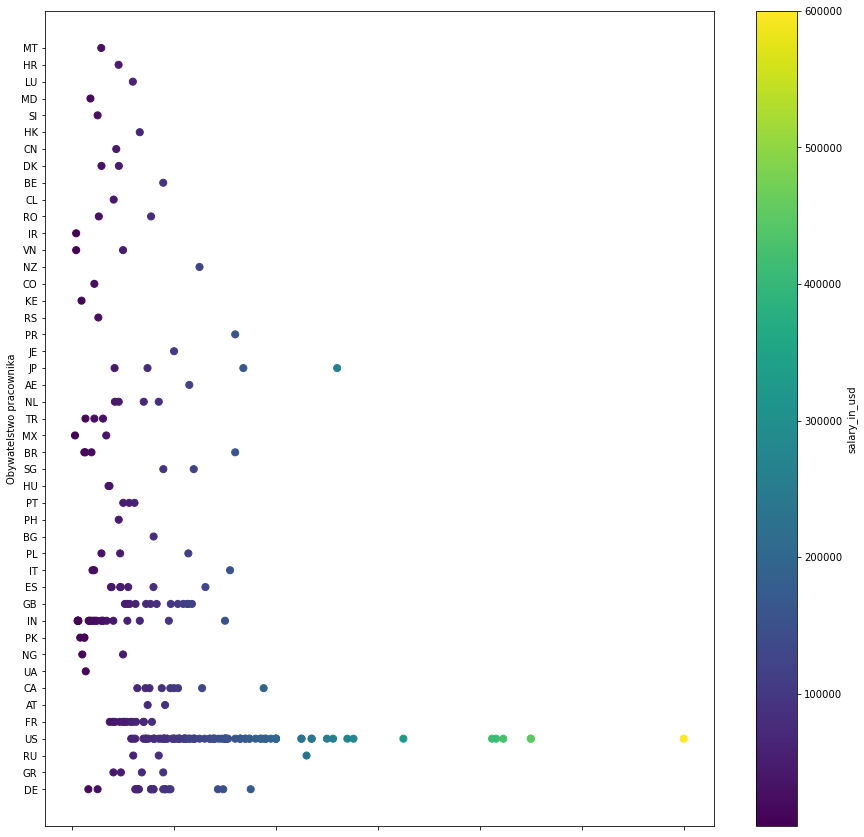

In [23]:
#Data scientis jest dość podbne zarobkowo, ale np.  ML engineer czy Finance Data Anlyst posiadją tylko 2 wartości
df.plot.scatter(x='salary_in_usd',xlabel="Wysokość wypłaty USD",y='employee_residence', ylabel="Obywatelstwo pracownika",figsize=(15, 15),c='salary_in_usd',cmap="viridis",s=50)

<AxesSubplot:xlabel='Lokalizacja firmy', ylabel='Obywatelstwo pracownika'>

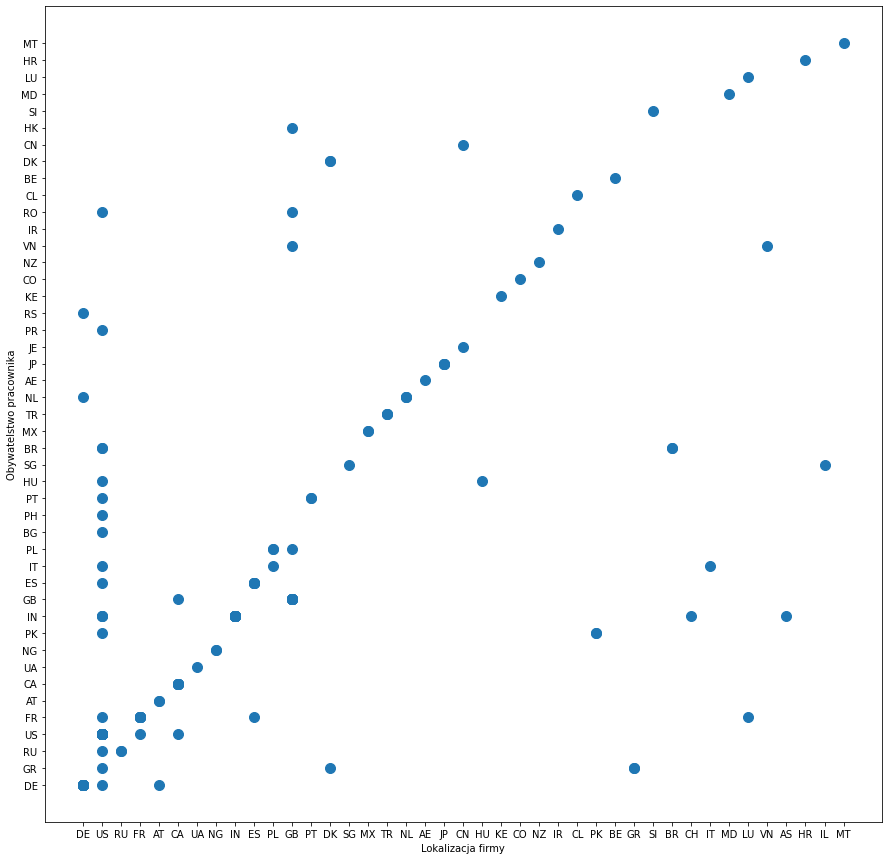

In [24]:
#Sprawdzamy w jakich mijscach jest możłwiość pracy dla prcowników spoza kraju
df.plot.scatter(x='company_location',xlabel="Lokalizacja firmy",y='employee_residence', ylabel="Obywatelstwo pracownika",figsize=(15, 15),s=100)

<AxesSubplot:xlabel='Wysokość wypłaty USD', ylabel='Lokalizacja firmy'>

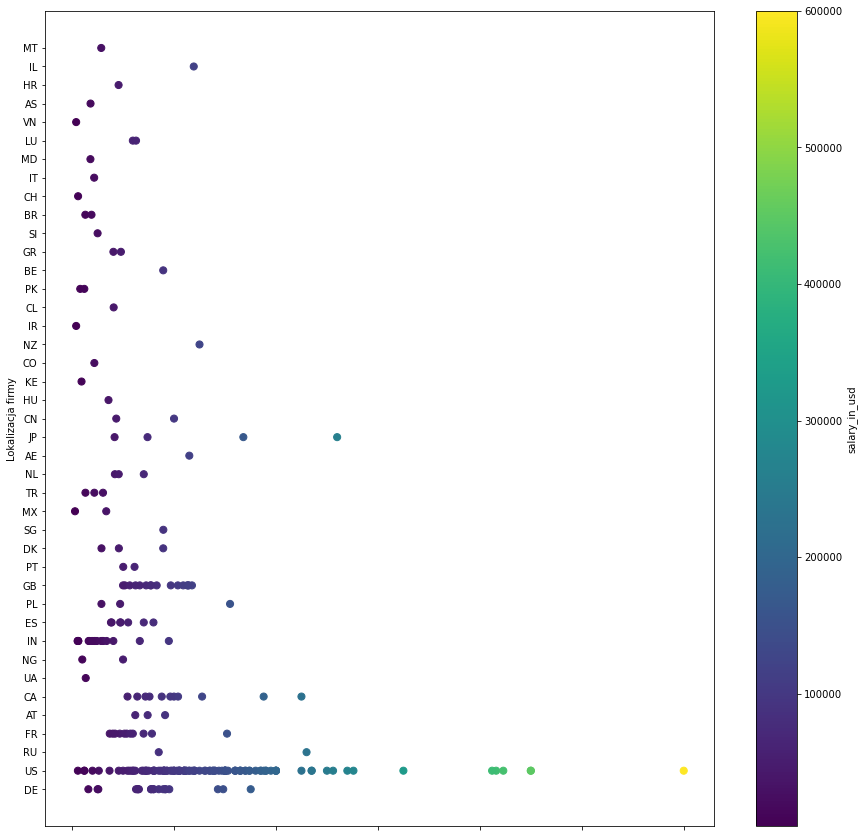

In [25]:
#Wykres porónujący lokalizację firmy a wypłatę.

df.plot.scatter(x='salary_in_usd',xlabel="Wysokość wypłaty USD",y='company_location', ylabel="Lokalizacja firmy",figsize=(15, 15),c='salary_in_usd',cmap="viridis",s=50)

<AxesSubplot:xlabel='Wysokość wypłaty USD', ylabel='Poziom doświadczenia'>

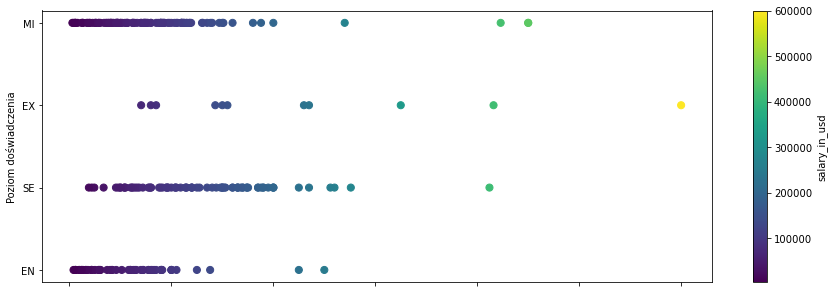

In [40]:
#Wykres porónujący poziom zaawansowania a wypłatę. TODO: Opis stanowisk i zmianakolejności od entry do experience
df.plot.scatter(x='salary_in_usd',xlabel="Wysokość wypłaty USD",y='experience_level', ylabel="Poziom doświadczenia",figsize=(15, 5),c='salary_in_usd',cmap="viridis",s=50)

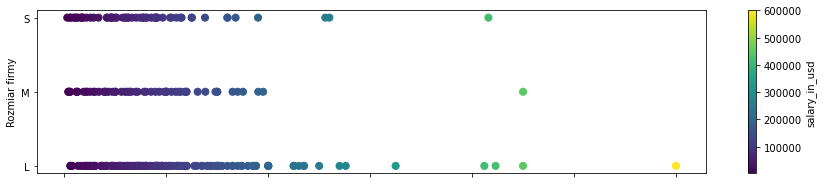

In [39]:
#Wykres porónujący rozmiar firmy a wypłatę.

cbar=df.plot.scatter(x='salary_in_usd',xlabel="Wysokość wypłaty USD",y='company_size', ylabel="Rozmiar firmy",figsize=(15, 3),c='salary_in_usd',cmap="viridis",s=50)


<AxesSubplot:ylabel='Praca zdalnie'>

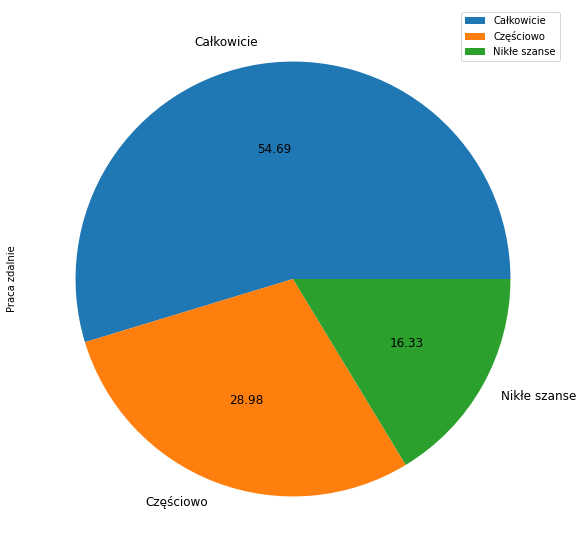

In [29]:
#Wykres pokazujący ile osób pracuje zdalnie, 
df['remote_ratio'].value_counts().plot.pie(ylabel='Praca zdalnie',labels=["Całkowicie","Częściowo","Nikłe szanse"], figsize=(10, 10),fontsize=12,autopct="%.2f", legend=True)

<AxesSubplot:ylabel='Rodzaj zatrudnienia'>

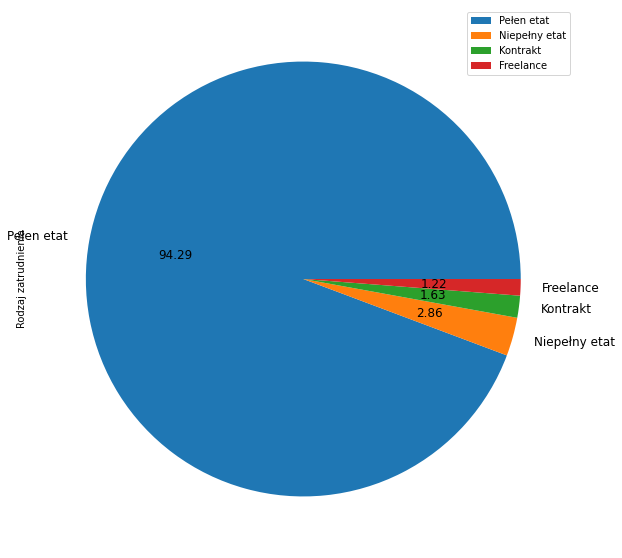

In [30]:
#Wykres pokazujący ile osób na jakim rodzajuu zatrudnienia

df['employment_type'].value_counts().plot.pie(ylabel='Rodzaj zatrudnienia',labels=["Pełen etat", "Niepełny etat", "Kontrakt", "Freelance"], figsize=(10, 10),fontsize=12,autopct="%.2f", legend=True)

In [31]:
#W związku z tym, że stanowiska pracy posidają czasami tylko jeden wpis dodajemy nową kolumnę, która będzie posiadała kategorię, w którą wpada dane stanowisko w celu sprawdzenia czy kwalifikacja przez kategorię bedzie dawac lepsze wyniki.
#Data scientist
#Manager,head,director
#Data analyst
#Data engineer
#inne 
def addLabel(row):
    row=str(row)
    if row.lower().find('head')>-1 or row.lower().find('manager')>-1 or row.lower().find('director')>-1:
        return 'Leader position'
    elif 'engineer' in row.lower():
        return 'Engineer'
    elif 'scientist' in row.lower():
        return 'Scientist'
    elif 'analyst' in row.lower():
        return 'Analyst'
    else:
        return 'Rest'
    
labelColumn=[]
for row in range(len(df['job_title'])):
    labelColumn.append(addLabel(df['job_title'][row]))
    
df=df.assign(label=labelColumn)
print(df[['job_title','label']][210:221])

#Kategoria typ dla label
y=df.select_dtypes(include='object')  #wyklucza kolumnę, która jest int64
columnNames=y.columns.tolist() #uzyskuję wszytskie kolumny, które są obiektami do zmiany na kategorię
        #Zmieniam obiekty na kategorie.
for col in columnNames:
    df[col]=df[col].astype('category')

df.info()


                    job_title      label
210  Computer Vision Engineer   Engineer
211            Data Scientist  Scientist
212  Computer Vision Engineer   Engineer
213     Business Data Analyst    Analyst
214  Principal Data Scientist  Scientist
215  Principal Data Scientist  Scientist
216            Data Scientist  Scientist
217            Data Scientist  Scientist
218            Data Scientist  Scientist
219              AI Scientist  Scientist
220            Data Scientist  Scientist
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           245 non-null    object  
 1   experience_level    245 non-null    category
 2   employment_type     245 non-null    category
 3   job_title           245 non-null    category
 4   salary_in_usd       245 non-null    float64 
 5   employee_residence  245 non-null    category
 6 

In [34]:
#Zapisanie dataframe do pliku
df.to_csv('CleanDataSalaries.csv',index=False)
